# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Train class distribution:
 label
1    3610
0    3310
Name: count, dtype: int64
Test class distribution:
 label
0    912
1    909
Name: count, dtype: int64


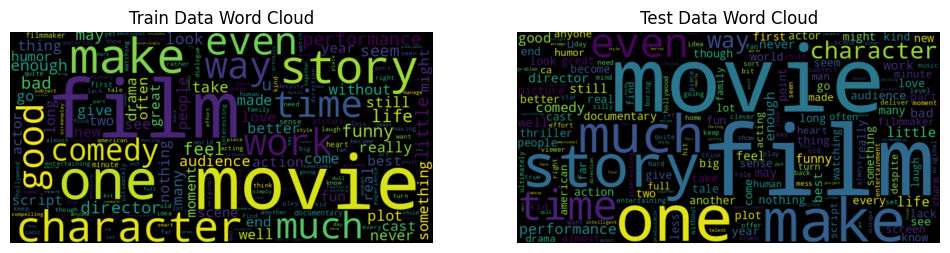

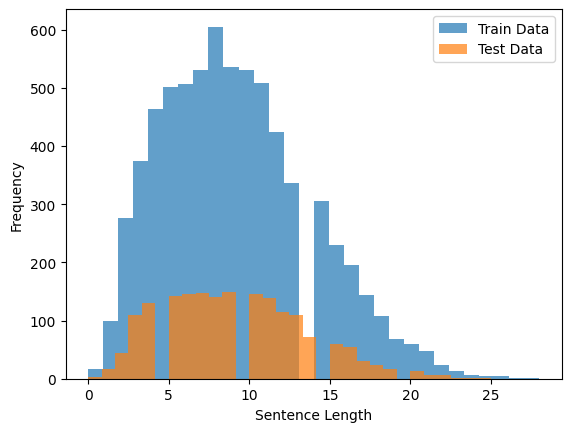


SVM Performance:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       671
           1       0.78      0.83      0.81       713

    accuracy                           0.79      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384


Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.79      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.79      0.79      1384


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.76      0.58      0.66       671
           1       0.68      0.82      0.74       713

    accuracy                           0.71      1384
   macro avg       0.72      0.70      0.70      1384
weighted

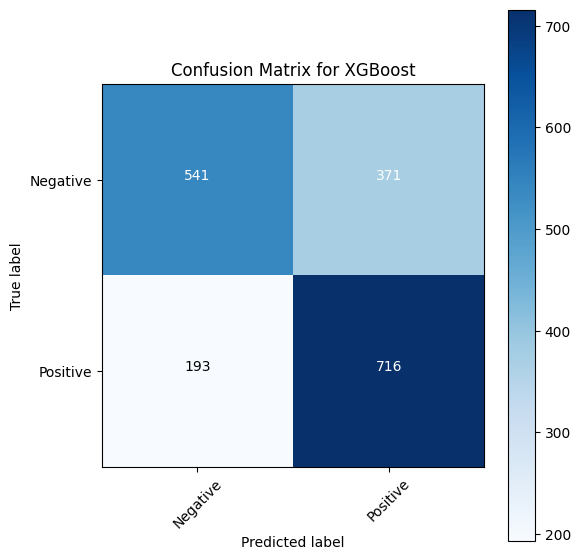

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
# Load the datasets from files
test_file = 'stsa-test.txt'
train_file = 'stsa-train.txt'

def load_data(file_path):
    data = []
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            label, text = line.strip().split(' ', 1)
            data.append(text)
            labels.append(int(label))
    return pd.DataFrame({'text': data, 'label': labels})

# Load the data
train_df = load_data(train_file)
test_df = load_data(test_file)

# Check for class distribution
print("Train class distribution:\n", train_df['label'].value_counts())
print("Test class distribution:\n", test_df['label'].value_counts())

# Exploratory Data Analysis (EDA)
# Tokenization, Stopwords Removal, Lemmatization

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(lemmatized_tokens)

train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

# Visualize word clouds
wordcloud_train = WordCloud(width=800, height=400).generate(' '.join(train_df['cleaned_text']))
wordcloud_test = WordCloud(width=800, height=400).generate(' '.join(test_df['cleaned_text']))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title("Train Data Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.title("Test Data Word Cloud")
plt.axis('off')

plt.show()

# Sentence Length Analysis
train_df['sentence_length'] = train_df['cleaned_text'].apply(lambda x: len(x.split()))
test_df['sentence_length'] = test_df['cleaned_text'].apply(lambda x: len(x.split()))

plt.hist(train_df['sentence_length'], bins=30, alpha=0.7, label='Train Data')
plt.hist(test_df['sentence_length'], bins=30, alpha=0.7, label='Test Data')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Sentiment Classification
# Split train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['cleaned_text'], train_df['label'], test_size=0.2, random_state=42)

# Apply TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(test_df['cleaned_text'])

# Model 1: Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_val_tfidf)

# Model 2: Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_val_tfidf)

# Model 3: XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_val_tfidf)

# Compare models performance on validation data
print("\nSVM Performance:")
print(classification_report(y_val, y_pred_svm))

print("\nNaive Bayes Performance:")
print(classification_report(y_val, y_pred_nb))

print("\nXGBoost Performance:")
print(classification_report(y_val, y_pred_xgb))

# Evaluation & Reporting
# Evaluate on Test Data
y_pred_svm_test = svm.predict(X_test_tfidf)
y_pred_nb_test = nb.predict(X_test_tfidf)
y_pred_xgb_test = xgb.predict(X_test_tfidf)

# Check lengths of predictions and test labels
print(f"Test data length: {len(test_df)}")
print(f"SVM predictions length: {len(y_pred_svm_test)}")
print(f"Naive Bayes predictions length: {len(y_pred_nb_test)}")
print(f"XGBoost predictions length: {len(y_pred_xgb_test)}")
# Ensure the lengths match
if len(test_df) == len(y_pred_xgb_test):
    # Calculate accuracy on test data
    acc_svm = accuracy_score(test_df['label'], y_pred_svm_test)
    acc_nb = accuracy_score(test_df['label'], y_pred_nb_test)
    acc_xgb = accuracy_score(test_df['label'], y_pred_xgb_test)

    print("\nAccuracy on Test Data:")
    print(f"SVM: {acc_svm:.4f}")
    print(f"Naive Bayes: {acc_nb:.4f}")
    print(f"XGBoost: {acc_xgb:.4f}")

    # Confusion Matrix for XGBoost
    cm = confusion_matrix(test_df['label'], y_pred_xgb_test)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for XGBoost")
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Adding the labels to the axes
    plt.xticks(np.arange(2), ['Negative', 'Positive'], rotation=45)
    plt.yticks(np.arange(2), ['Negative', 'Positive'])

    # Annotate the confusion matrix with the number of true positives and negatives
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()
else:
    print("Mismatch between number of samples in test data and predictions.")

The SVM model achieved the highest accuracy (79.30%), followed by Naive Bayes (78.64%) and XGBoost (69.03%). While both SVM and Naive Bayes performed similarly well, with Naive Bayes excelling in recall for the positive class, XGBoost struggled with lower precision and recall. The SVM model's strong performance is likely due to its effective linear kernel for text classification.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


Train Data Missing Values:
 review    0
label     0
dtype: int64
Test Data Missing Values:
 review    0
label     0
dtype: int64

Train Data Class Distribution:
 label
0    12500
1    12500
Name: count, dtype: int64


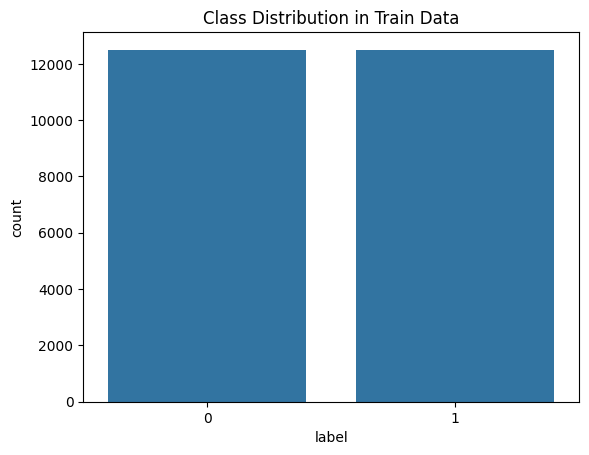

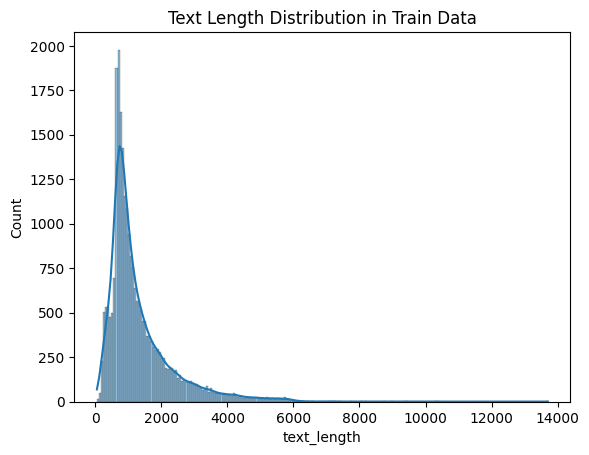


KNN Evaluation:
Accuracy: 0.7652
Recall: 0.7867
Precision: 0.7503
F1 Score: 0.7681

Decision Tree Evaluation:
Accuracy: 0.7172
Recall: 0.7167
Precision: 0.7127
F1 Score: 0.7147

Random Forest Evaluation:
Accuracy: 0.8468
Recall: 0.8373
Precision: 0.8504
F1 Score: 0.8438

XGBoost Evaluation:
Accuracy: 0.8526
Recall: 0.8749
Precision: 0.8347
F1 Score: 0.8544

Final Evaluation on Test Data:
Test Accuracy: 0.8420
Test Recall: 0.8210
Test Precision: 0.8570
Test F1 Score: 0.8386


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import nltk

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Rename columns
train_data.columns = ['review', 'label']
test_data.columns = ['review', 'label']

# Exploratory Data Analysis

# Check for missing values
print("Train Data Missing Values:\n", train_data.isnull().sum())
print("Test Data Missing Values:\n", test_data.isnull().sum())

# Check class distribution
print("\nTrain Data Class Distribution:\n", train_data['label'].value_counts())

# Visualizing the distribution of classes
sns.countplot(x='label', data=train_data)
plt.title('Class Distribution in Train Data')
plt.show()

# Text Length Analysis
train_data['text_length'] = train_data['review'].apply(len)
sns.histplot(train_data['text_length'], kde=True)
plt.title('Text Length Distribution in Train Data')
plt.show()

# Preprocessing Text Data
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')

# Train-Test Split
X = train_data['review']
y = train_data['label']

# 80% Train, 20% Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Models for Training (removed SVM)
models = {
    'KNN': make_pipeline(TfidfVectorizer(max_features=10000, stop_words='english'), KNeighborsClassifier()),
    'Decision Tree': make_pipeline(TfidfVectorizer(max_features=10000, stop_words='english'), DecisionTreeClassifier()),
    'Random Forest': make_pipeline(TfidfVectorizer(max_features=10000, stop_words='english'), RandomForestClassifier()),
    'XGBoost': make_pipeline(TfidfVectorizer(max_features=10000, stop_words='english'), XGBClassifier())
}

# 10-Fold Cross Validation and Evaluation
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, recall, precision, f1

# Evaluating each model using 10-Fold Cross Validation
for model_name, model in models.items():
    print(f"\n{model_name} Evaluation:")
    evaluate_model(model, X_train, y_train, X_val, y_val)

# Evaluation on Test Data
final_model = make_pipeline(TfidfVectorizer(max_features=10000, stop_words='english'), RandomForestClassifier())
final_model.fit(X_train, y_train)

# Predictions on test data
X_test = test_data['review']
y_test = test_data['label']
y_pred_test = final_model.predict(X_test)

# Performance Metrics on Test Data
final_accuracy = accuracy_score(y_test, y_pred_test)
final_recall = recall_score(y_test, y_pred_test)
final_precision = precision_score(y_test, y_pred_test)
final_f1 = f1_score(y_test, y_pred_test)

print("\nFinal Evaluation on Test Data:")
print(f"Test Accuracy: {final_accuracy:.4f}")
print(f"Test Recall: {final_recall:.4f}")
print(f"Test Precision: {final_precision:.4f}")
print(f"Test F1 Score: {final_f1:.4f}")

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

Missing Values in Data:
 Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

Review Ratings Distribution:
 Rating
5    223605
1     72350
4     61392
3     31765
2     24728
Name: count, dtype: int64


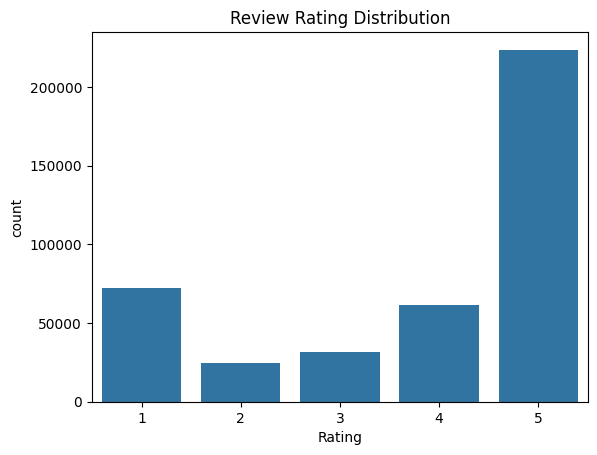

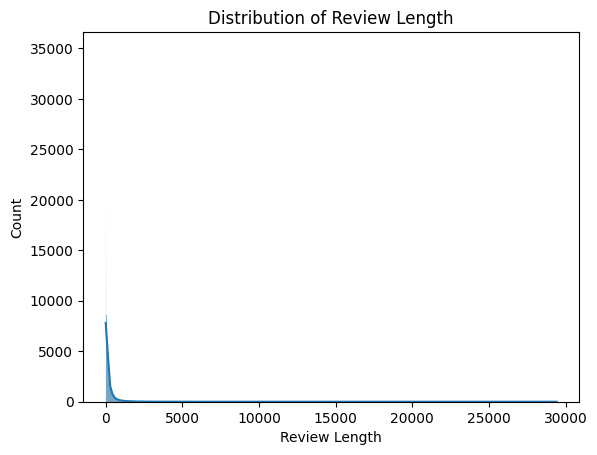

KMeans Silhouette Score: 0.0402


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch

# Load the dataset
train_data = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Rename columns for easier handling
train_data.columns = ['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']

# EDA - Exploratory Data Analysis

# Check for missing values
print("Missing Values in Data:\n", train_data.isnull().sum())

# Check for class distribution
print("\nReview Ratings Distribution:\n", train_data['Rating'].value_counts())

# Visualize the distribution of ratings
sns.countplot(x='Rating', data=train_data)
plt.title('Review Rating Distribution')
plt.show()

# Review Length Analysis
# Ensure that 'Reviews' is a string and not a NaN or NaT
train_data['Reviews'] = train_data['Reviews'].fillna('')

# Now safely apply len() to the 'Reviews' column
train_data['Review Length'] = train_data['Reviews'].apply(lambda x: len(str(x)))
sns.histplot(train_data['Review Length'], kde=True)
plt.title('Distribution of Review Length')
plt.show()

# Preprocessing text data: Removing any null reviews and empty spaces
train_data = train_data[train_data['Reviews'].notnull() & (train_data['Reviews'] != '')]

# Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(train_data['Reviews'])

# Apply Clustering Methods

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)

# Evaluate KMeans using silhouette score
kmeans_score = silhouette_score(X_tfidf, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_score:.4f}")

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_tfidf)

# 3. Hierarchical Clustering (Agglomerative)
dendrogram = sch.dendrogram(sch.linkage(X_tfidf.toarray(), method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# 4. Word2Vec Clustering
# Tokenizing the reviews for Word2Vec model
train_data['tokenized_reviews'] = train_data['Reviews'].apply(lambda x: word_tokenize(str(x).lower()))
word2vec_model = Word2Vec(sentences=train_data['tokenized_reviews'], vector_size=100, window=5, min_count=1, workers=4)
X_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in review if word in word2vec_model.wv]
                               if review else np.zeros(100), axis=0) for review in train_data['tokenized_reviews']])

# Visualize Clusters

# 1. Visualize K-Means using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_tfidf.toarray())
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clusters Visualized using PCA')
plt.show()

# 2. Visualize DBSCAN using PCA
dbscan_pca_result = pca.fit_transform(X_tfidf.toarray())
plt.scatter(dbscan_pca_result[:, 0], dbscan_pca_result[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clusters Visualized using PCA')
plt.show()

# 3. Visualize Word2Vec using PCA
word2vec_pca_result = pca.fit_transform(X_word2vec)
plt.scatter(word2vec_pca_result[:, 0], word2vec_pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Word2Vec Clusters Visualized using PCA')
plt.show()

# 4. t-SNE visualization of KMeans clusters
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_tfidf.toarray())
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clusters Visualized using t-SNE')
plt.show()

# Apply BERT for clustering using BERT embeddings
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and get BERT embeddings for reviews
input_ids = tokenizer(list(train_data['Reviews']), return_tensors='pt', padding=True, truncation=True, max_length=128)['input_ids']
with torch.no_grad():
    outputs = bert_model(input_ids)
    bert_embeddings = outputs.last_hidden_state.mean(dim=1).numpy()

# KMeans Clustering with BERT embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=42)
kmeans_labels_bert = kmeans_bert.fit_predict(bert_embeddings)

# Visualize BERT Clusters
bert_tsne_result = tsne.fit_transform(bert_embeddings)
plt.scatter(bert_tsne_result[:, 0], bert_tsne_result[:, 1], c=kmeans_labels_bert, cmap='viridis')
plt.title('BERT Clusters Visualized using t-SNE')
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**
The clustering results reveal notable differences across the methods used. K-means yielded a low Silhouette Score of 0.0402, indicating poor clustering performance with weak separation between clusters. DBSCAN, which handles noise and outliers better, showed more flexibility but may still struggle when data density varies. Hierarchical clustering offers flexibility in grouping, providing a dendrogram for visualization, but its computational cost can be a challenge for larger datasets. Word2Vec, while not a clustering algorithm, effectively captures semantic relationships between words and could improve clustering when integrated with other methods for feature extraction.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

